In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')


In [3]:
a = Value(5, label='a')
b = Value(2, label='b')
c = Value(3, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'

In [4]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # Left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

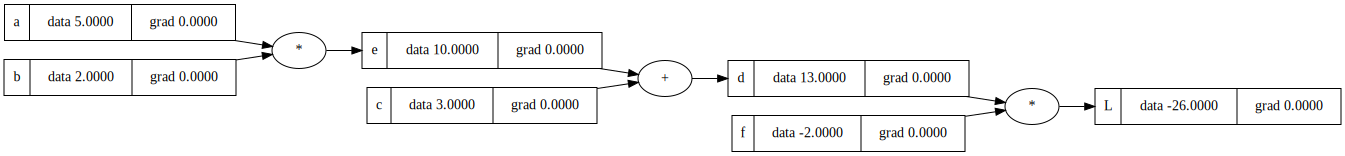

In [5]:
draw_dot(L)

In [6]:
# manual backprop
L.grad = 1
f.grad = d.data * L.grad
d.grad = f.data * L.grad
e.grad = 1*d.grad
c.grad = 1*d.grad
a.grad = b.data*e.grad
b.grad = a.data*e.grad

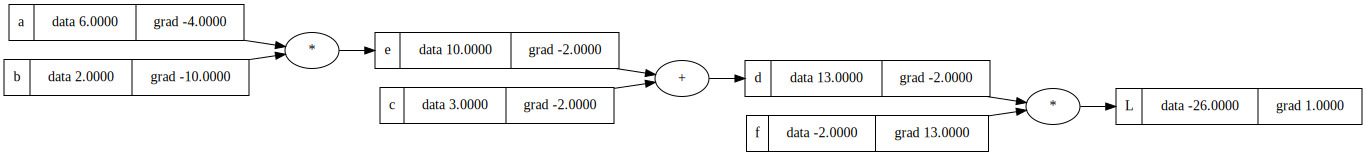

In [11]:
draw_dot(L)

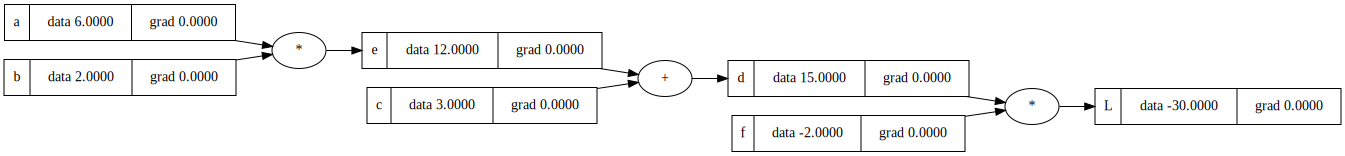

In [22]:
#theory: if a goes up by 1 to 6, then the L should go down by 4
def lol(): # function to not mess up global variables
    a = Value(6, label='a')
    b = Value(2, label='b')
    c = Value(3, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    return draw_dot(L)

dd = lol()
dd
# L before: -26
# L after: -30


In [26]:
# derivative w.r.t. vars using definition of the derivative
# (so cool)
def lol(): # function to not mess up global variables
    h = 0.001
    
    a = Value(5, label='a')
    b = Value(2+h, label='b')
    c = Value(3, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L1.label='L1'
    
    a = Value(5, label='a')
    b = Value(2, label='b')
    c = Value(3, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L2 = d * f; L.label='L2'
    
    return (L1.data-L2.data)/h

dd = lol()
dd
# L before: -26
# L after: -30

-9.99999999999801